<a href="https://colab.research.google.com/github/jaydextra/IBM-Data-Science-Course/blob/Master/Analytics_Capstone_Project_First_Draft_James_Louis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# save CSV as a Dataframe
df = pd.read_csv('Airline_Delay_Cause_NY.csv')

**Description of Flight Delay Categories Analyzed**
<br>
<br>
**Air Carrier Delays:** Caused by issues within the airline's control, such as maintenance, crew problems, aircraft cleaning, baggage loading, or fueling.

**Extreme Weather Delays:** Caused by severe weather conditions like tornadoes, blizzards, or hurricanes that delay or prevent flight operations.

**National Aviation System (NAS) Delays:** Caused by non-extreme weather, airport operations, heavy traffic, or air traffic control issues.

**Late-Arriving Aircraft Delays**: Caused when a previous flight using the same aircraft arrives late, delaying the next departure.

**Security Delays:** Caused by terminal evacuations, security breaches, inoperative screening equipment, or long screening lines exceeding 29 minutes

In [ ]:
# show first 5 rows of df
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,1,9E,Endeavor Air Inc.,EWR,"Newark, NJ: Newark Liberty International",148,41,5.95,0.63,...,0.00,4.44,0,0,1891,401,12,1221,0,257
1,2023,1,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1636,464,65.20,4.43,...,0.20,136.51,20,4,31803,6903,488,12317,19,12076
2,2023,1,AA,American Airlines Network,EWR,"Newark, NJ: Newark Liberty International",705,243,52.78,6.98,...,3.17,59.96,15,0,13262,2640,449,5276,138,4759
3,2023,1,AA,American Airlines Network,JFK,"New York, NY: John F. Kennedy International",1211,263,67.94,4.56,...,4.26,78.21,11,2,20483,7321,283,5451,197,7231
4,2023,1,AS,Alaska Airlines Network,EWR,"Newark, NJ: Newark Liberty International",269,78,16.24,2.02,...,0.00,17.92,8,3,4331,1053,114,2172,0,992


In [ ]:
# Display info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 400 non-null    int64  
 1   month                400 non-null    int64  
 2   carrier              400 non-null    object 
 3   carrier_name         400 non-null    object 
 4   airport              400 non-null    object 
 5   airport_name         400 non-null    object 
 6   arr_flights          400 non-null    int64  
 7   arr_del15            400 non-null    int64  
 8   carrier_ct           400 non-null    float64
 9   weather_ct           400 non-null    float64
 10  nas_ct               400 non-null    float64
 11  security_ct          400 non-null    float64
 12  late_aircraft_ct     400 non-null    float64
 13  arr_cancelled        400 non-null    int64  
 14  arr_diverted         400 non-null    int64  
 15  arr_delay            400 non-null    int

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [ ]:
# Display a statistical summary
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,400.0,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2023.0,6.462500,1139.6450,235.890000,67.763950,8.217300,91.446400,0.579275,67.88290,30.872500,3.842500,18542.140000,5913.175000,966.217500,5438.647500,27.417500,6196.682500
std,0.0,3.471126,1329.8014,309.461741,88.491748,11.735804,123.556953,1.135500,106.77266,70.181656,7.308641,28343.940146,9096.185763,1671.150716,8481.144749,56.234366,11123.217917
min,2023.0,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,3.000000,185.7500,44.750000,16.387500,0.962500,9.877500,0.000000,7.05500,1.000000,0.000000,2483.500000,899.750000,30.750000,497.000000,0.000000,522.750000
50%,2023.0,6.000000,596.0000,136.000000,43.065000,3.710000,49.620000,0.000000,34.32500,6.000000,1.000000,8701.500000,2883.500000,288.000000,2172.500000,0.000000,2655.500000
75%,2023.0,9.000000,1558.0000,288.500000,80.500000,11.412500,126.015000,0.880000,83.16500,28.250000,4.000000,22603.500000,6752.750000,1162.250000,7227.000000,27.250000,6912.250000
max,2023.0,12.000000,6692.0000,2051.000000,543.720000,83.410000,888.390000,6.610000,712.92000,584.000000,76.000000,205416.000000,63384.000000,13652.000000,72056.000000,390.000000,92782.000000


In [ ]:
# Calculate the IQR  for delay counts
Q1 = df['arr_del15'].quantile(0.25)
Q3 = df['arr_del15'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[df['arr_del15'] > upper_bound]

In [ ]:
# Check the total number of outliers
print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 27


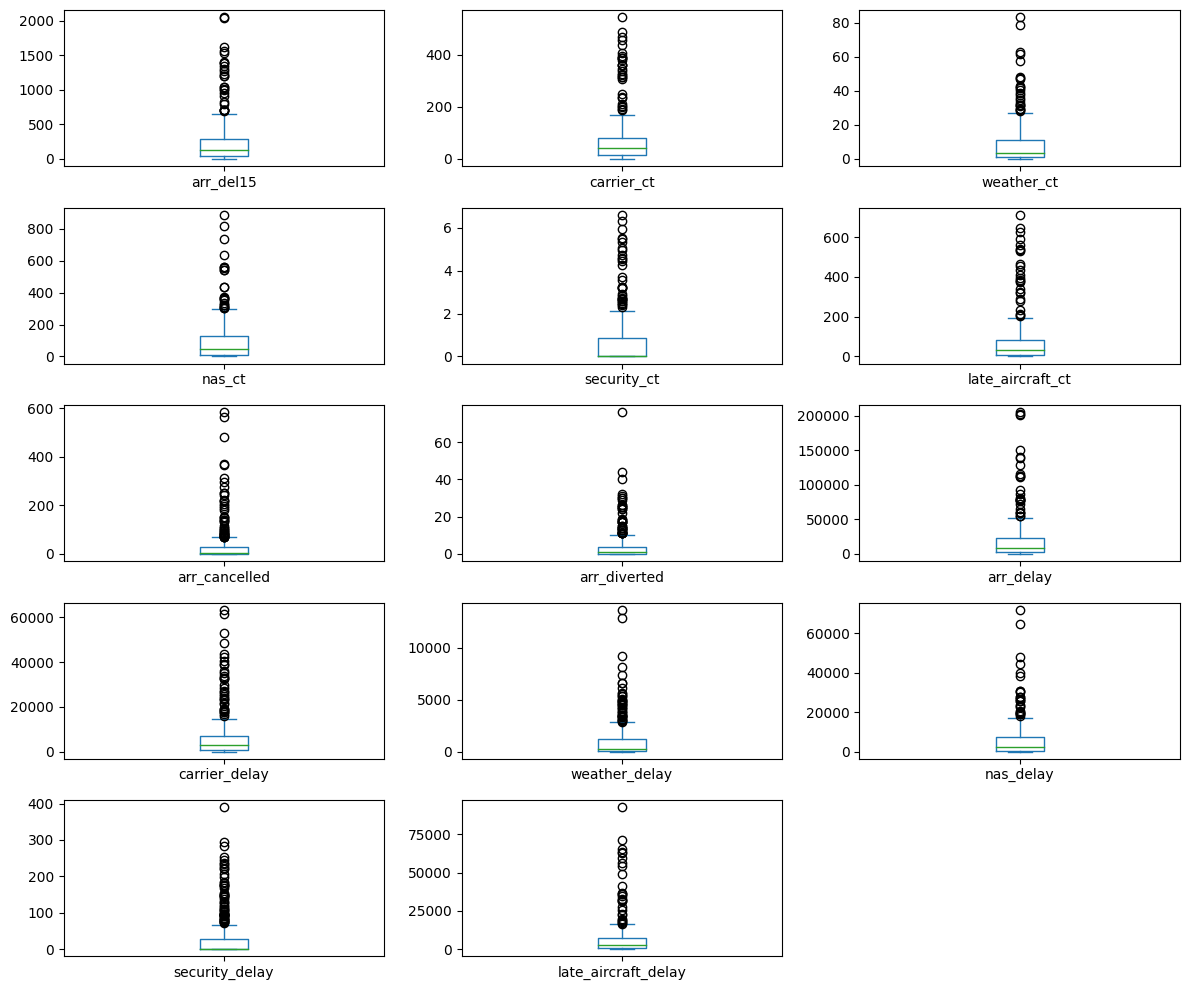

In [ ]:
# Define the delayed influence columns
delayed_influence_cols = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
                          'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
                          'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
                          'late_aircraft_delay']

# Create box plots for delayed columns
df[delayed_influence_cols].plot(kind='box', subplots=True, layout=(5, 3), figsize=(12, 10), sharex=False, sharey=False)

# plot box plot
plt.tight_layout()
plt.show()


**Box Plot Summary: Flight Delay Causes and Distribution**

The box plots show how different delay factors are distributed across the data, focusing on outliers, median values, and the IQR for each delay cause:

**arr_del15:** Flights delayed by 15 minutes or more. The plot shows some unusually long delays.

**carrier_ct:** Delays caused by the airline. There are a few extreme cases, suggesting possible operational issues.

**weather_ct:** Weather-related delays are less frequent, but there are still some outliers due to severe weather.

**nas_ct:** Delays from the National Airspace System have several outliers, showing some extreme cases.

**late_aircraft_ct:** Delays due to late-arriving planes show many outliers, indicating it's a common cause of big delays.

Other delay factors, like cancellations and diversions, also show outliers, meaning extreme delays can happen in different areas. Most delays are within a normal range, but there are outliers across different causes, which might need further investigation.

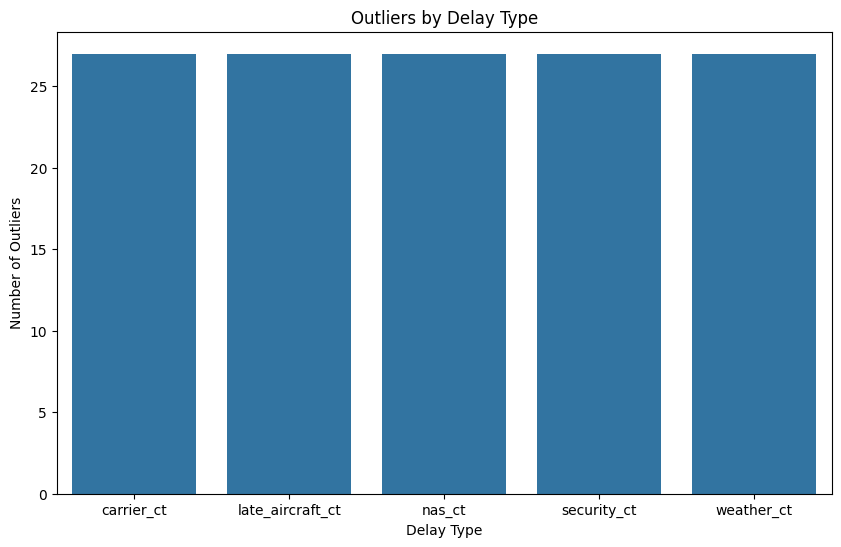

In [ ]:
# List of delay types to analyze
delay_columns = ['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct']

# Reshape the data for easier analysis
melted_outliers = outliers.melt(id_vars='arr_del15', value_vars=delay_columns, var_name='Delay_Type', value_name='Count')

# Count the outliers for each delay type
outliers_by_delay_type = melted_outliers.groupby('Delay_Type')['arr_del15'].count().reset_index()

# Create a bar chart to show the number of outliers for each delay type
plt.figure(figsize=(10, 6))
sns.barplot(x='Delay_Type', y='arr_del15', data=outliers_by_delay_type)
plt.title('Outliers by Delay Type')
plt.xlabel('Delay Type')
plt.ylabel('Number of Outliers')
plt.show()


**Outlier Analysis: Delay Causes**

The bar chart shows the number of outliers for different delay types. Each type of delay has similar amounts of outliers, suggesting that extreme delays happen for multiple reasons:

**Carrier Delays:** Some flights experienced significant delays due to issues related to the carrier.

**Late Aircraft Delays:** Delays caused by late-arriving aircraft are a frequent cause of these outliers.

**NAS Delays:** Delays related to air traffic or airspace control also show some outliers.

**Security Delays:** While less common, some security-related delays led to significant outliers.

**Weather Delays:** Weather-related delays also contribute to the outliers but are not as frequent as other types.

No one type of delay stands out as the main cause of outliers. All the delay types have a similar number of extreme cases. We'll keep the outliers in the analysis to better understand what causes these big delays.

In [ ]:
# Group by month and aggregate the data
monthly_delays = df.groupby('month').agg({
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'late_aircraft_ct': 'sum'
}).reset_index()

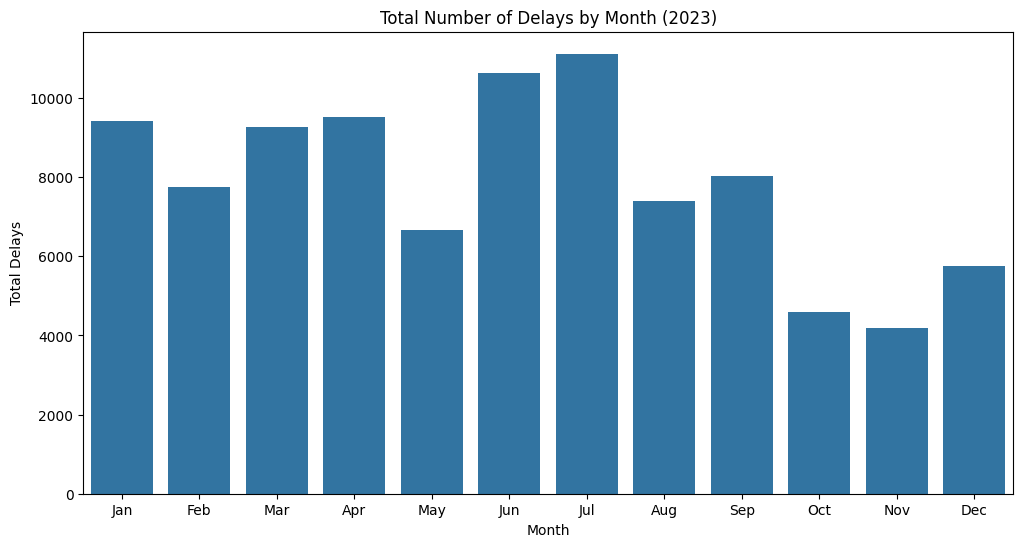

In [ ]:
# Plot the total number of delays by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='arr_del15', data=monthly_delays)
plt.title('Total Number of Delays by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Delays')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Total Number of Delays by Month (2023)**

The bar chart shows the total number of flight delays by month in 2023. July and June had the most delays, with over 10,000 each month, likely due to seasonal peaks. There’s a clear drop in delays during the fall, with September, November, and December having fewer delays than the summer months. This pattern could be due to higher travel in the summer or other challenges during that time.

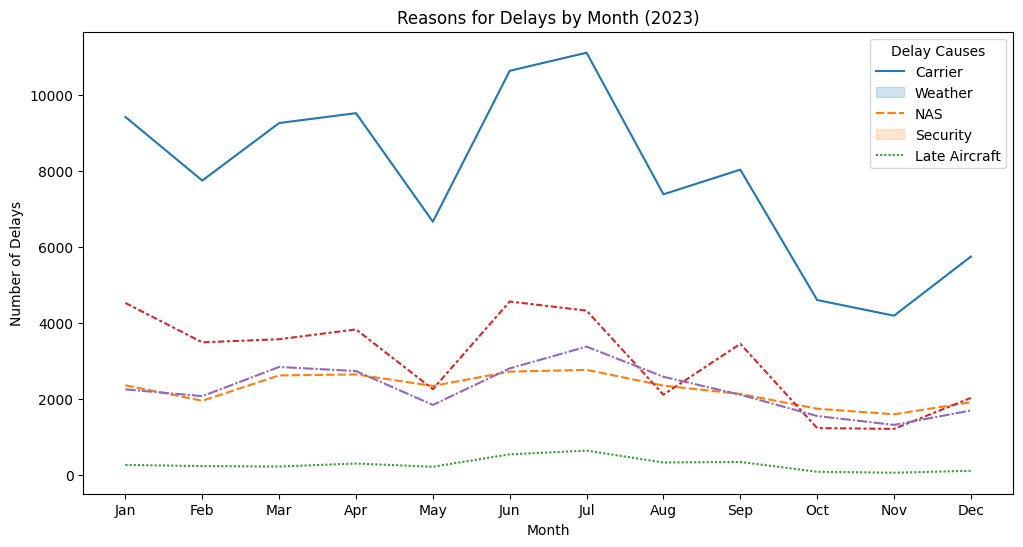

In [ ]:
# Plot the reasons for delays by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delays.drop('month', axis=1))
plt.title('Reasons for Delays by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.legend(title='Delay Causes', labels=['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft'])
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Line Plot Summary: Reasons for Delays by Month (2023)**

This line plot shows the different reasons for flight delays each month in 2023, broken down into five categories: Carrier, Weather, NAS (National Airspace System), Security, and Late Aircraft.

**Key insights:**

Carrier delays were the highest throughout the year, peaking in July and August, highlighting operational issues during the summer.

NAS delays also peaked in July and August, pointing to air traffic control and related issues.

Weather delays were more unpredictable but peaked in June and July, likely due to seasonal weather events.

Late aircraft delays stayed steady most of the year but increased in July.

Security delays were very low and didn't change much compared to the other causes.

July and August had the most delays, mainly due to increases in carrier, NAS, and weather-related delays.

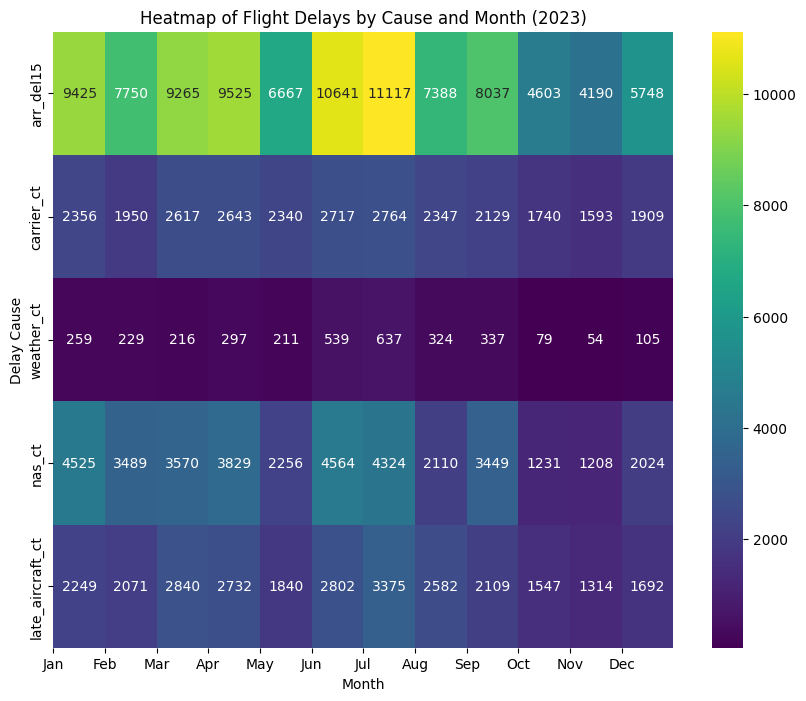

In [ ]:
# plot delays using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_delays.set_index('month').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('Heatmap of Flight Delays by Cause and Month (2023)')
plt.xlabel('Month')
plt.ylabel('Delay Cause')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Heatmap Summary: Flight Delays by Cause and Month (2023)**

This heatmap shows the number of flight delays by different causes across the months of 2023, including carrier delays, weather delays, NAS delays (National Airspace System), and late aircraft delays.

**Key insights:**

July had the highest total delays (11,117 delays), but this spike was due to cumulative smaller peaks across all delay causes, rather than a single dominant cause.

Carrier delays, NAS delays, weather delays, and late aircraft delays all contributed moderately to the increase in July.

Carrier delays and NAS delays were consistently high, with peaks in July and August.

Weather delays were most frequent in the summer, especially in June and July.
Late aircraft delays were steady but peaked in July.

In [ ]:
# Sum total counts and total delay times for each type of delay
delay_summary = pd.DataFrame({
    'total_delay_count': [
        df['carrier_ct'].sum(),
        df['weather_ct'].sum(),
        df['nas_ct'].sum(),
        df['late_aircraft_ct'].sum()
    ],
    'total_delay_time': [
        df['carrier_delay'].sum(),
        df['weather_delay'].sum(),
        df['nas_delay'].sum(),
        df['late_aircraft_delay'].sum()
    ]
}, index=['Carrier Delays', 'Weather Delays', 'NAS Delays', 'Late Aircraft Delays'])

# Reset index to convert index to a column
delay_summary = delay_summary.reset_index().rename(columns={'index': 'Delay Cause'})

# Round total_delay_count and total_delay_time to whole numbers
delay_summary['total_delay_count'] = delay_summary['total_delay_count'].round(0).astype(int)
delay_summary['total_delay_time'] = delay_summary['total_delay_time'].round(0).astype(int)

# Calculate and round the average delay time per event
delay_summary['avg_delay_time'] = (delay_summary['total_delay_time'] / delay_summary['total_delay_count']).round(0).astype(int)

# Print the summary to check the calculated average delay time
print(delay_summary)


            Delay Cause  total_delay_count  total_delay_time  avg_delay_time
0        Carrier Delays              27106           2365270              87
1        Weather Delays               3287            386487             118
2            NAS Delays              36579           2175459              59
3  Late Aircraft Delays              27153           2478673              91


<ipython-input-16-bafd8d72676a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(delay_summary['Delay Cause'], rotation=45, ha='right')


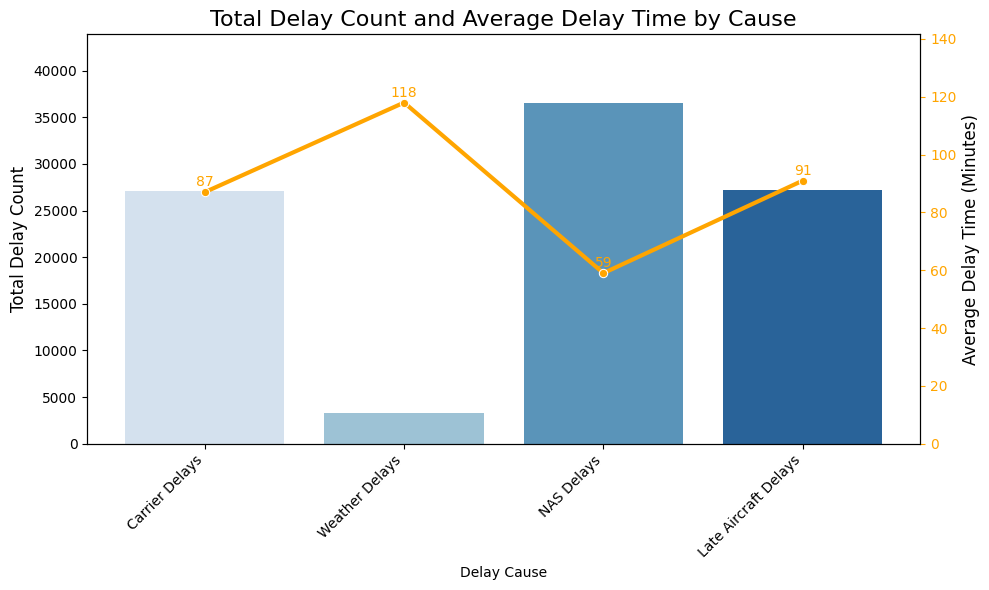

In [ ]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total delay count (using a more muted color for better contrast with line)
sns.barplot(x='Delay Cause', y='total_delay_count', data=delay_summary, palette='Blues',hue='Delay Cause', ax=ax1)
ax1.set_ylabel('Total Delay Count', fontsize=12)
ax1.set_title('Total Delay Count and Average Delay Time by Cause', fontsize=16)

# Use a second y-axis for the average delay time with better color contrast
ax2 = ax1.twinx()
sns.lineplot(x='Delay Cause', y='avg_delay_time', data=delay_summary, color='orange', marker='o', linewidth=3, ax=ax2)
ax2.set_ylabel('Average Delay Time (Minutes)', fontsize=12)
ax2.tick_params(axis='y', colors='orange')

# Add data labels for the average delay time
for index, value in enumerate(delay_summary['avg_delay_time']):
    ax2.text(index, value + 2, f'{value}', color='orange', ha='center', fontsize=10)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(delay_summary['Delay Cause'], rotation=45, ha='right')

# Adjust y-limits for better contrast
ax1.set_ylim(0, delay_summary['total_delay_count'].max() * 1.2)  # 20% padding on total delay count
ax2.set_ylim(0, delay_summary['avg_delay_time'].max() * 1.2)     # 20% padding on avg delay time

plt.tight_layout()
plt.show()



**Bar Plot Summary: Total Delay Count and Average Delay Time by Cause**

This bar plot displays the total number of delays and the average delay time (in minutes) for four key causes of flight delays. The total delay count reflects how frequently delays occurred, while the average delay time shows how long these delays lasted on average.

**Key insights:**

NAS Delays account for the highest number of delays, with over 36,000 events, but these delays have the shortest average duration, at around 59 minutes per event.While NAS issues are frequent, they tend to be resolved more quickly compared to other types of delays.

Late Aircraft Delays are both frequent and impactful, with 27,153 delays and an average delay time of 91 minutes. These delays occur when a previous flight arrives late, causing a ripple effect on subsequent flights.

Carrier Delays, which include delays within the airline's control (such as maintenance or crew-related issues), occurred 27,105 times, with an average delay time of 87 minutes. This is similar in frequency and duration to late aircraft delays.

Weather Delays, although less frequent, with only 3,286 events, had the longest average delay time at 118 minutes. While weather-related delays are rare, they tend to be the most disruptive, resulting in longer wait times when they do occur.

This plot highlights the balance between the frequency of delays and their severity (measured by the average delay time). While NAS delays are the most common, weather delays are the most time-consuming, making them particularly challenging for both airlines and passengers.

In [ ]:
# Group by airline and sum delay counts, delay time, and flights
airline_delays = df.groupby('carrier_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# Calculate delay rate as a percentage of delayed flights
airline_delays['delay_rate'] = airline_delays['arr_del15'] / airline_delays['arr_flights'] * 100

# Sort by delay rate
airline_delays = airline_delays.sort_values('delay_rate', ascending=False)


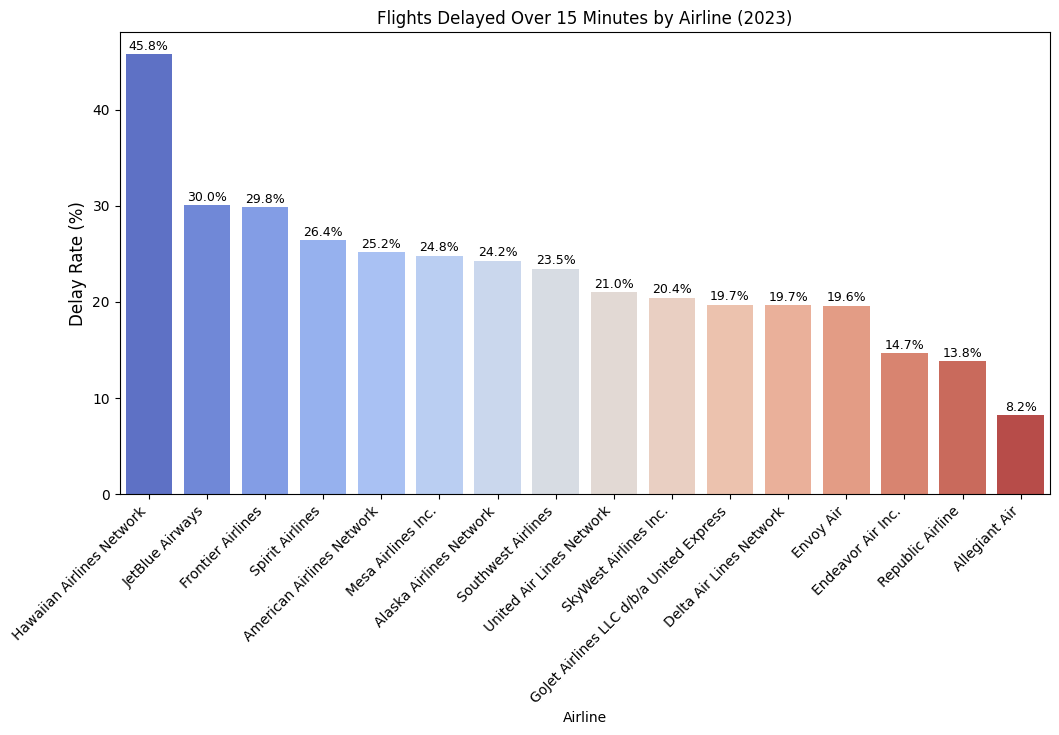

In [ ]:
# Create bar plot with delay rates by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier_name', y='delay_rate', data=airline_delays, palette='coolwarm', hue='carrier_name', dodge=False)

# Add delay rate labels on the bars
for index, value in enumerate(airline_delays['delay_rate']):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=9)

# Set plot title and labels
plt.title('Flights Delayed Over 15 Minutes by Airline (2023)')
plt.xlabel('Airline')
plt.ylabel('Delay Rate (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


**Bar Plot Summary: Flights Delayed Over 15 Minutes by Airline (2023)**

This bar plot displays the delay rates (percentage of flights delayed by over 15 minutes) for various airlines in 2023. The delay rate represents the percentage of delayed flights relative to the total number of flights operated by each airline.

**Key insights:**

Hawaiian Airlines Network has the highest delay rate at 45.8%, significantly higher than other airlines.

JetBlue Airways and Frontier Airlines follow with delay rates of 30.0% and 29.8%.

Airlines such as Spirit Airlines (26.4%) and American Airlines Network (25.2%) also show relatively high delay rates.

Allegiant Air has the lowest delay rate at 8.2%, followed by Republic Airline (13.8%).

This plot helps show which airlines experience the highest and lowest percentages of delayed flights.

In [ ]:
# Group by airport and sum delay counts, delay time, and flights
airport_delays = df.groupby('airport_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# Calculate delay rate as a percentage of delayed flights
airport_delays['delay_rate'] = airport_delays['arr_del15'] / airport_delays['arr_flights'] * 100

# Sort by delay rate
airport_delays = airport_delays.sort_values('delay_rate', ascending=False)


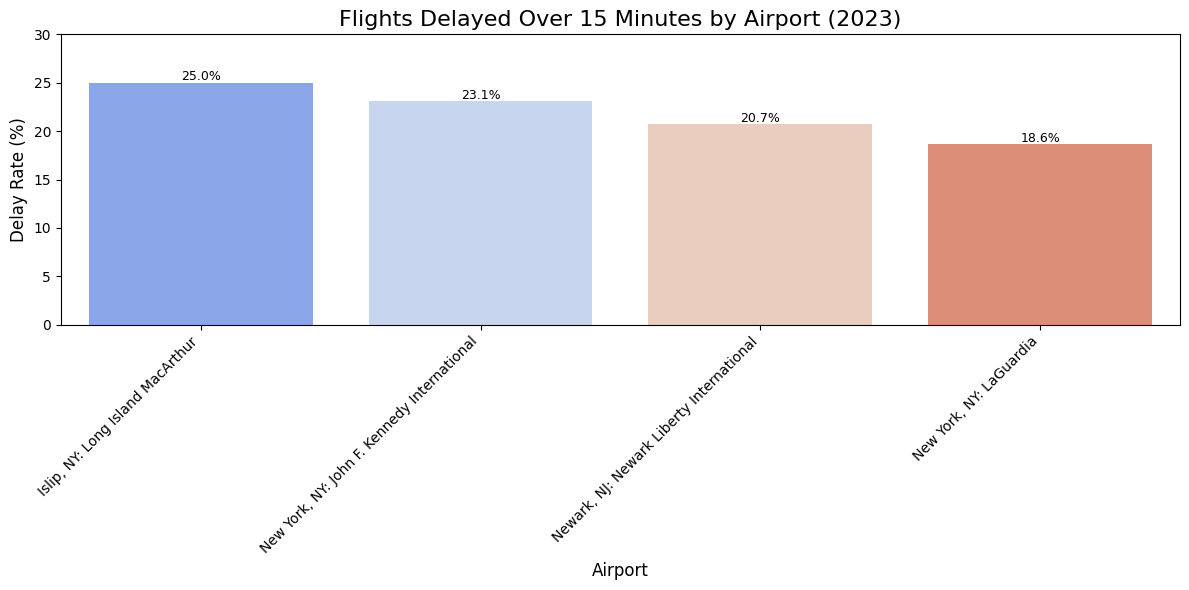

In [ ]:
# Create bar plot for delay rates by airport
plt.figure(figsize=(12, 6))
sns.barplot(x='airport_name', y='delay_rate', hue='airport_name', data=airport_delays, palette='coolwarm', dodge=False, legend=False)

# Add delay rate labels on the bars
for index, value in enumerate(airport_delays['delay_rate']):
    plt.text(index, value + 0.25, f'{value:.1f}%', ha='center', fontsize=9)

# Set title and labels
plt.title('Flights Delayed Over 15 Minutes by Airport (2023)', fontsize=16)
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Delay Rate (%)', fontsize=12)

# Adjust x-axis labels and y-axis limits
plt.xticks(rotation=45, ha='right')
plt.ylim(0, airport_delays['delay_rate'].max() + 5)

# Show the plot
plt.tight_layout()
plt.show()


**Bar Plot Summary: Flights Delayed Over 15 Minutes by Airport (2023)**

The bar plot above visualizes the delay rates (percentage of flights delayed by over 15 minutes) for different airports in 2023. The delay rate is calculated as the percentage of delayed flights relative to the total number of flights at each airport.

**Key insights:**

**ISP** Long Island MacArthur has the highest delay rate at 25.0%.

**JFK:** John F. Kennedy International follows with a delay rate of 23.1%.

**EWR:** Newark Liberty International has a slightly lower delay rate of 20.7%.

**LGA:** LaGuardia has the lowest delay rate among the listed airports, at 18.6%.


Correlation of features with arr_del15:
arr_del15              1.000000
arr_delay              0.973940
carrier_ct             0.957841
late_aircraft_ct       0.952460
carrier_delay          0.942248
late_aircraft_delay    0.931923
nas_ct                 0.926381
nas_delay              0.887400
arr_flights            0.872522
arr_diverted           0.705457
weather_ct             0.700806
weather_delay          0.673998
arr_cancelled          0.641969
security_delay         0.283483
security_ct            0.280576
month                 -0.119979
year                        NaN
Name: arr_del15, dtype: float64


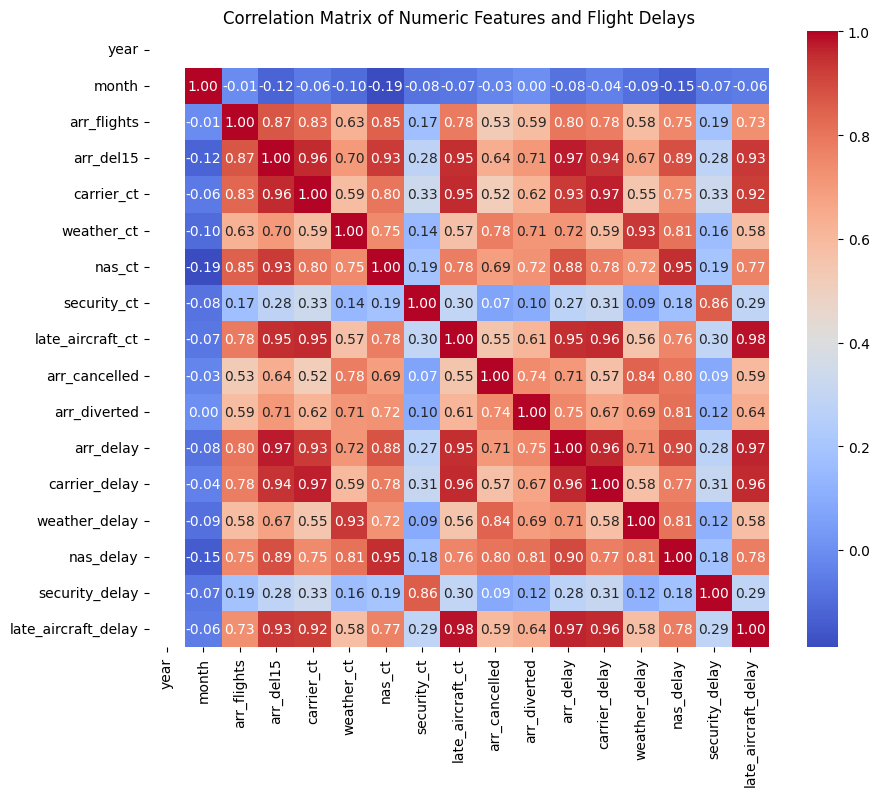

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric features
corr_matrix = numeric_df.corr()

# Focus on correlation with number of delayed flights
delay_corr = corr_matrix['arr_del15'].sort_values(ascending=False)

# Display the correlations
print("Correlation of features with arr_del15:")
print(delay_corr)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features and Flight Delays')
plt.show()


**Correlation Analysis Summary:**

We conducted a correlation analysis to identify the features most strongly related to the number of delayed flights (arr_del15). The key findings are:

**Carrier Delays (carrier_ct):** Shows a very high correlation of 0.95 with the number of delayed flights. This indicates that delays caused by the carrier are one of the strongest predictors of flight delays.

**Late Aircraft Delays (late_aircraft_ct):** Also strongly correlated with the number of delayed flights, with a correlation of 0.95. Flights delayed due to late-arriving aircraft are a significant contributor to overall delays.

**NAS Delays (nas_ct):** Correlation of 0.92, showing that delays related to the National Airspace System (NAS) are another major factor.

**Total Arrivals (arr_flights):** Correlated at 0.87. This shows that the more flights arriving, the higher the chance for delays.

**Weather Delays (weather_ct):** Correlation of 0.70. Weather-related delays are also relevant but less influential than carrier or NAS-related delays.

The analysis shows that carrier delays, late aircraft delays, NAS delays, and the total number of flights are the most important features influencing the number of delayed flights. Other features, such as security delays and the month of the year, show much weaker correlations, indicating they have less impact on predicting delays.



In [ ]:
# Group by month and airport, summing the delay counts and total flights
monthly_airport_delays = df.groupby(['month', 'airport']).agg({
    'carrier_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'nas_ct': 'sum',
    'arr_flights': 'sum'  # Total flights for percentage calculation
}).reset_index()

# Calculate the percentage of each delay type
monthly_airport_delays['carrier_pct'] = (monthly_airport_delays['carrier_ct'] / monthly_airport_delays['arr_flights']) * 100
monthly_airport_delays['late_aircraft_pct'] = (monthly_airport_delays['late_aircraft_ct'] / monthly_airport_delays['arr_flights']) * 100
monthly_airport_delays['nas_pct'] = (monthly_airport_delays['nas_ct'] / monthly_airport_delays['arr_flights']) * 100

# Reshape the DataFrame
melted_monthly_airport_delays = monthly_airport_delays.melt(
    id_vars=['month', 'airport'],
    value_vars=['carrier_pct', 'late_aircraft_pct', 'nas_pct'],
    var_name='Delay Type',
    value_name='Percentage'
)


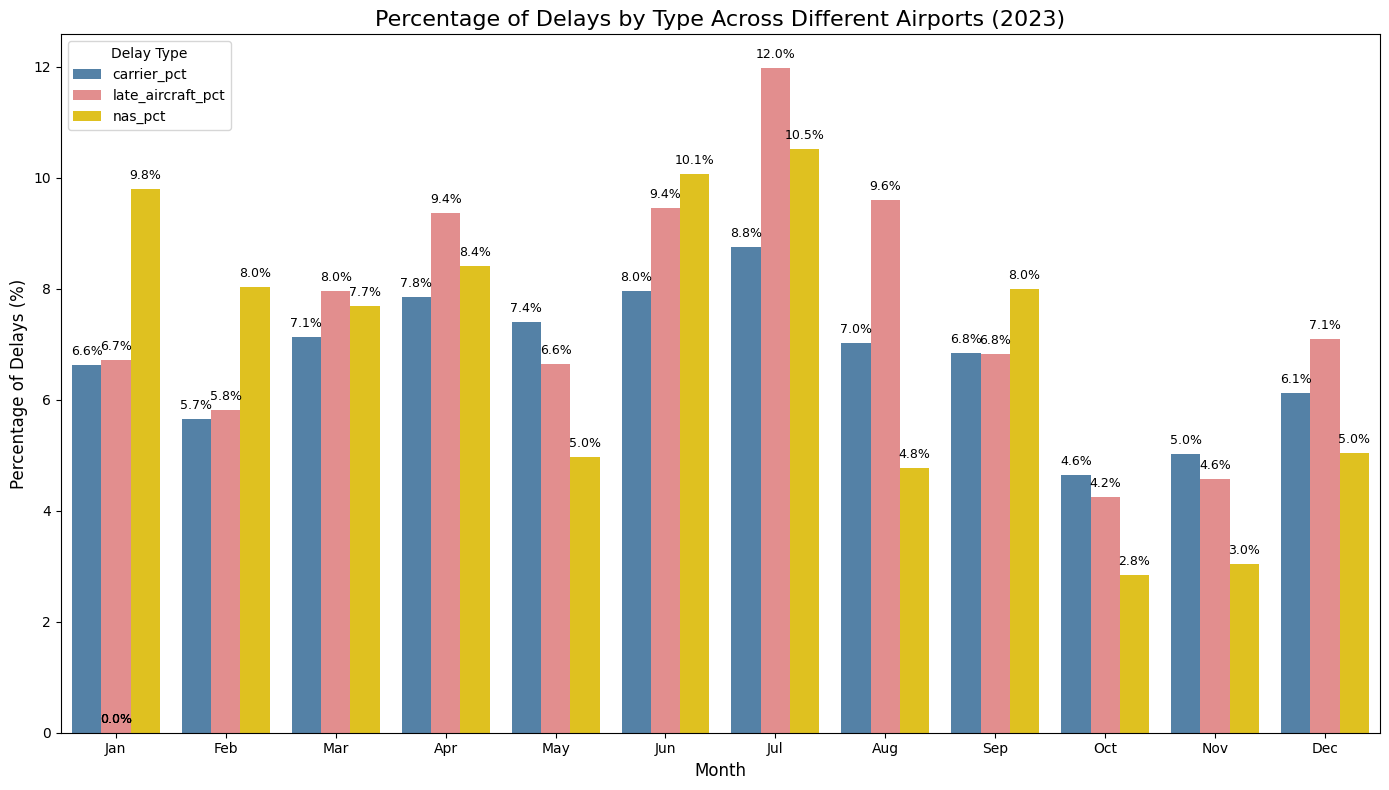

In [ ]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Define colors for each delay type
palette = {
    "carrier_pct": "steelblue",
    "late_aircraft_pct": "lightcoral",
    "nas_pct": "gold"
}

# Create a bar plot showing percentage delays by month and delay type
bar_plot = sns.barplot(
    x='month',
    y='Percentage',
    hue='Delay Type',
    data=melted_monthly_airport_delays,
    palette=palette,
    errorbar=None
)

# Set the title and axis labels
plt.title('Percentage of Delays by Type Across Different Airports (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of Delays (%)', fontsize=12)

# Label the axis by month
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add percentage labels on top of each bar
for p in bar_plot.patches:
    plt.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

# Adjust the legend position and layout
plt.legend(title='Delay Type', loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

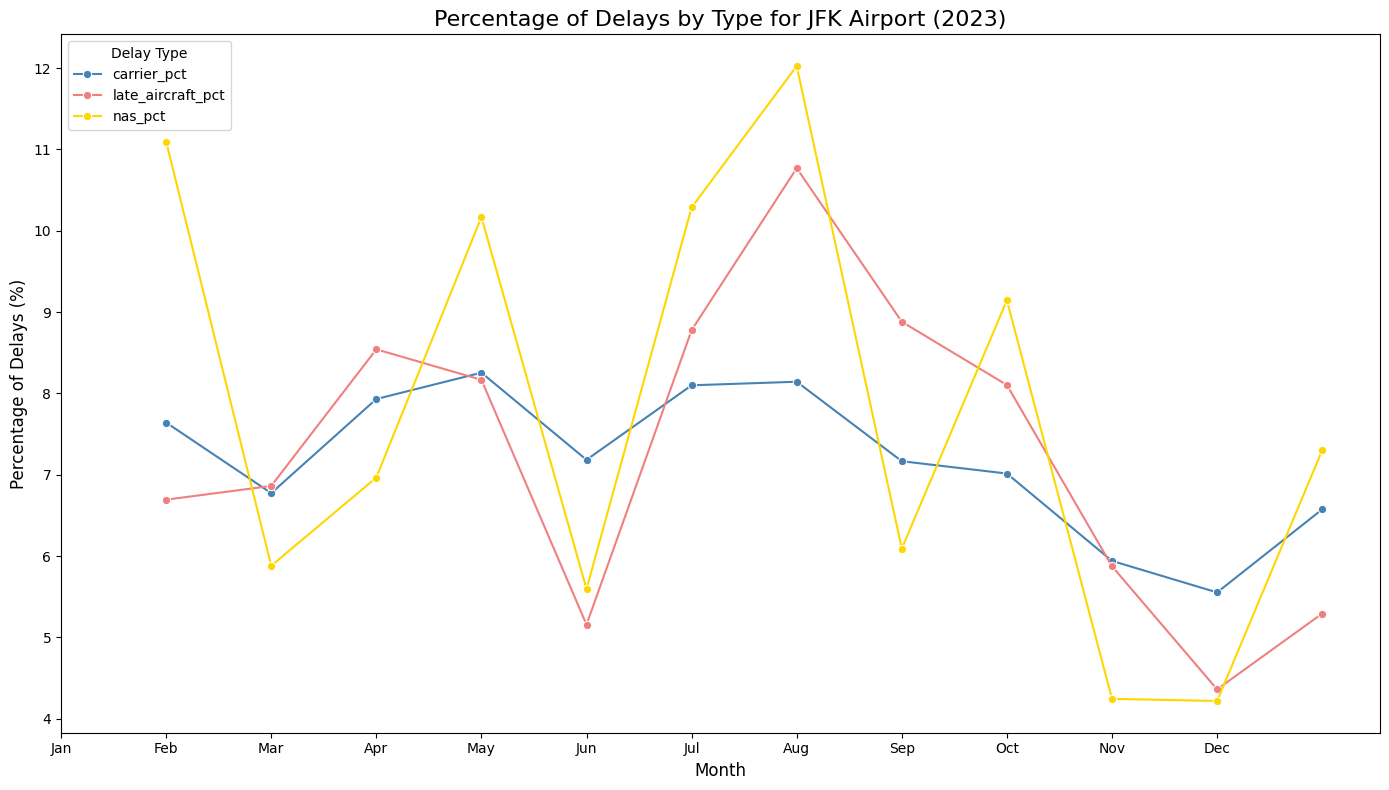

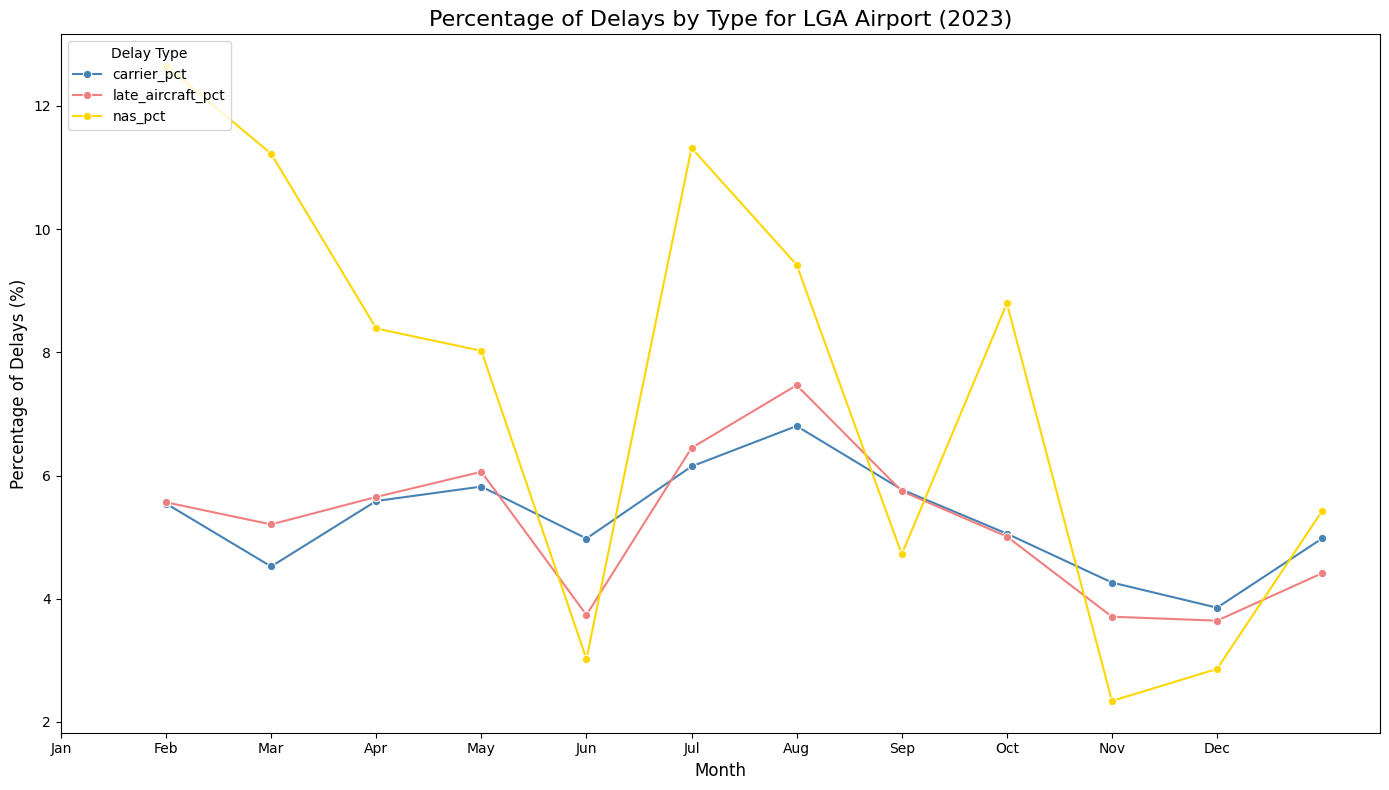

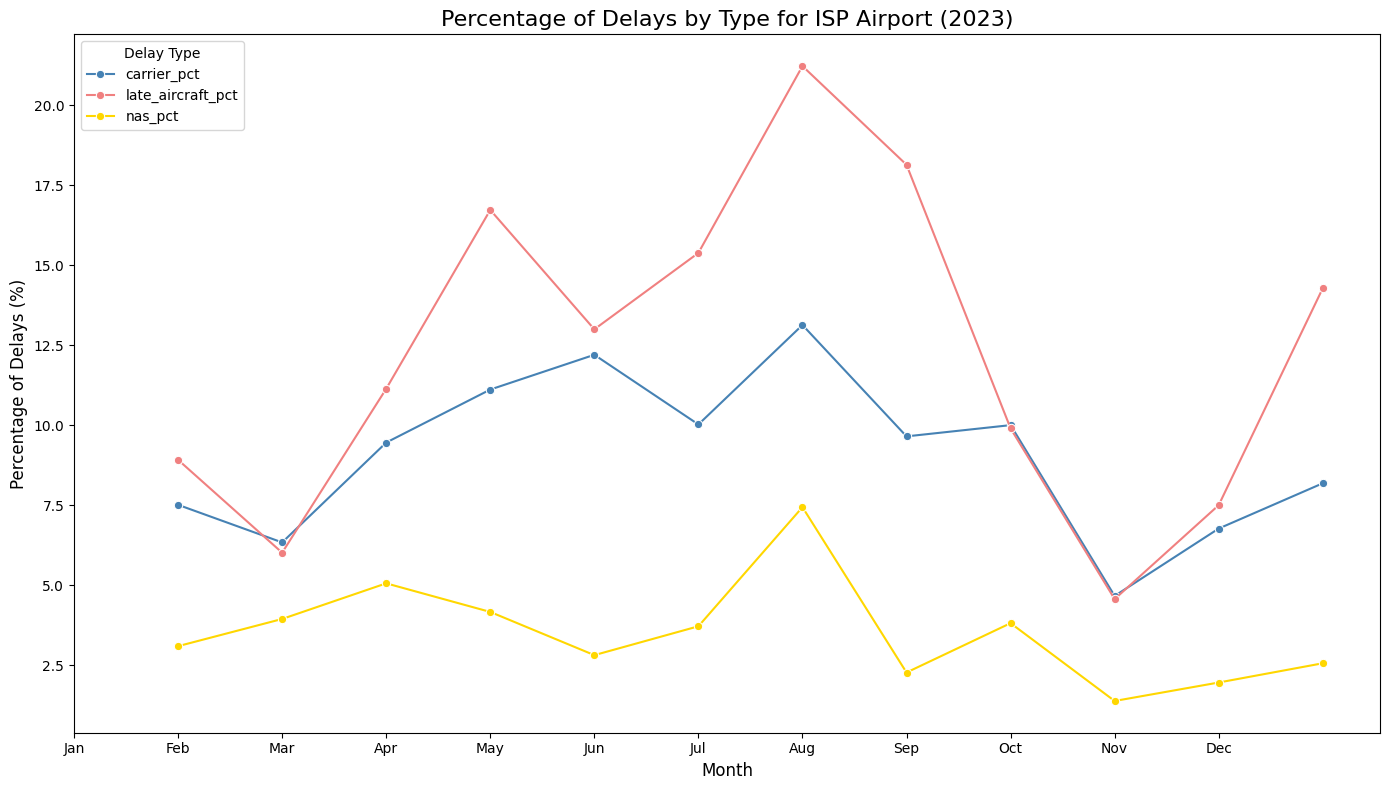

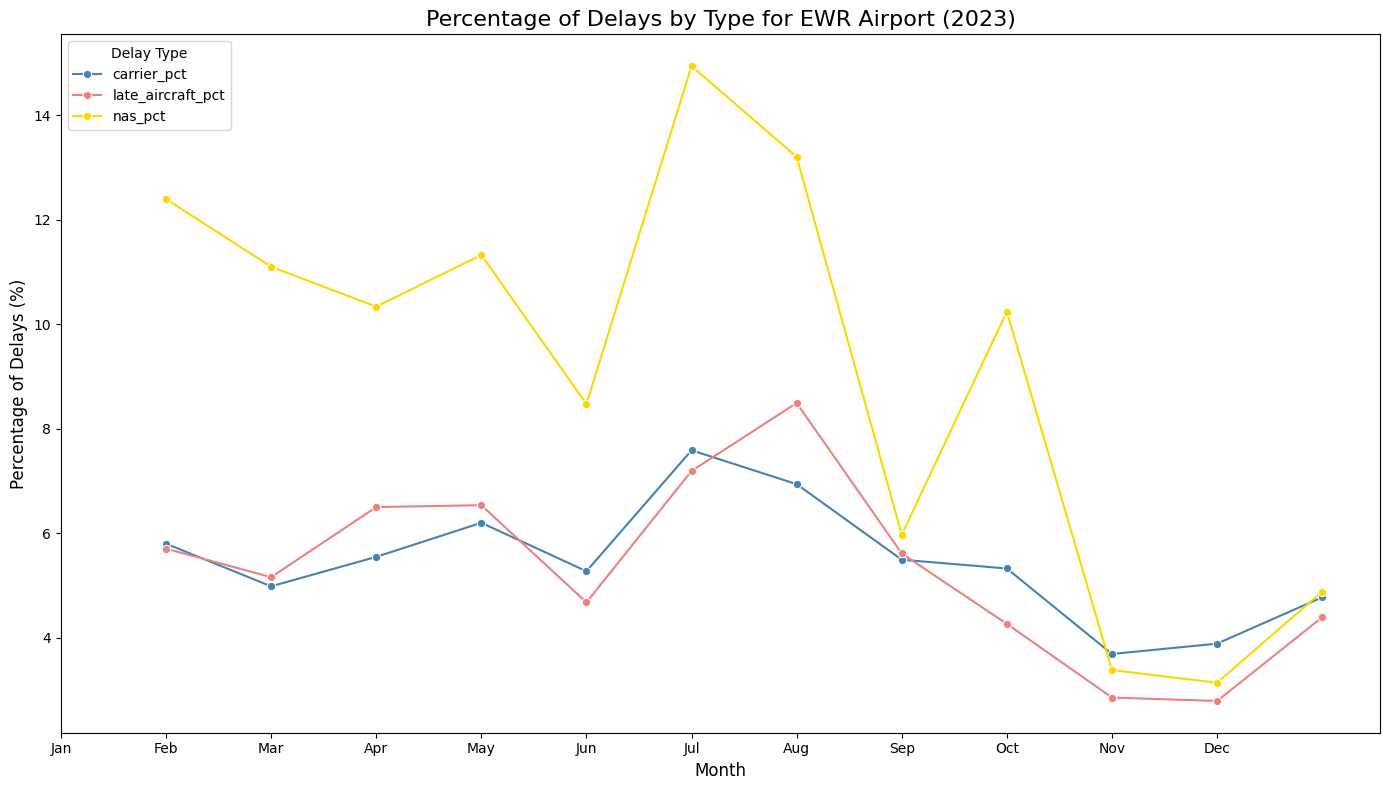

In [ ]:
# List of selected airports
selected_airports = ['JFK', 'LGA', 'ISP', 'EWR']

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Define colors for each delay type
palette = {
    "carrier_pct": "steelblue",
    "late_aircraft_pct": "lightcoral",
    "nas_pct": "gold"
}

# Loop through each airport to create a line plot
for airport in selected_airports:
    airport_data = melted_monthly_airport_delays[melted_monthly_airport_delays['airport'] == airport]

    # Create a line plot for percentage delays by month and delay type
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=airport_data,
        x='month',
        y='Percentage',
        hue='Delay Type',
        palette=palette,
        marker='o'
    )

    # Set the title and labels for the current airport
    plt.title(f'Percentage of Delays by Type for {airport} Airport (2023)', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Percentage of Delays (%)', fontsize=12)

    # Label the axis by month
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Adjust the legend position and layout
    plt.legend(title='Delay Type', loc='upper left')
    plt.tight_layout()

    # Show the plot for the current airport
    plt.show()


**Summary of Line Plots for Percentage of Delays by Type Across Different Airports (2023)**

The line plots show the monthly percentage of delays at four major airports: JFK, LGA, ISP, and EWR, focusing on three types of delays: Carrier Delays, Late Aircraft Delays, and NAS Delays.

**ISP Airport:** Late Aircraft Delays spiked in the summer, especially in July, then dropped off. Carrier Delays followed a steady pattern, peaking slightly in June and August, while NAS Delays stayed lower overall, with a slight rise in the summer.

**EWR Airport:** NAS Delays were the most frequent all year, with a peak in September, suggesting air traffic issues were common. Carrier and Late Aircraft Delays were more stable, with small changes during the summer.

**JFK Airport:** NAS Delays were high early in the year and again in the summer, peaking in May and July. Late Aircraft Delays also rose in the summer, while Carrier Delays stayed fairly constant throughout the year.

**LGA Airport:** NAS Delays were the most significant, with peaks in June and July. Both Late Aircraft and Carrier Delays rose slightly in the summer but stayed relatively stable overall.

NAS Delays had the highest percentages across all airports, especially during the summer, pointing to air traffic control issues. ISP stood out with sharp peaks in Late Aircraft Delays, while JFK and EWR showed a stronger link between flight volume and delays. This analysis helps understand the delay patterns at each airport and can guide efforts to reduce them.

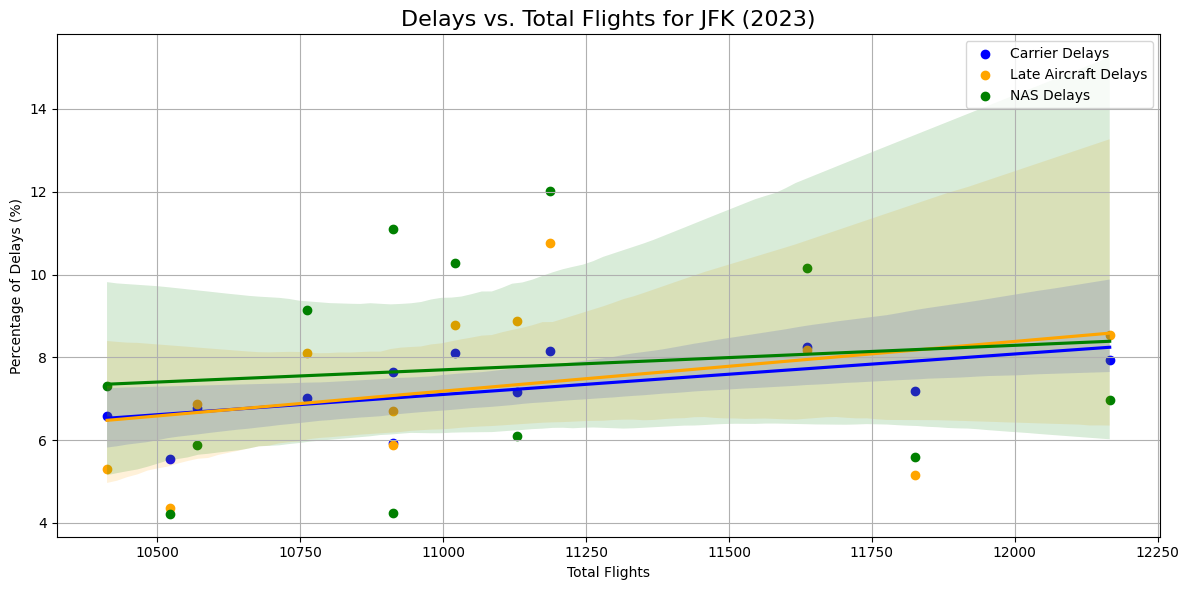

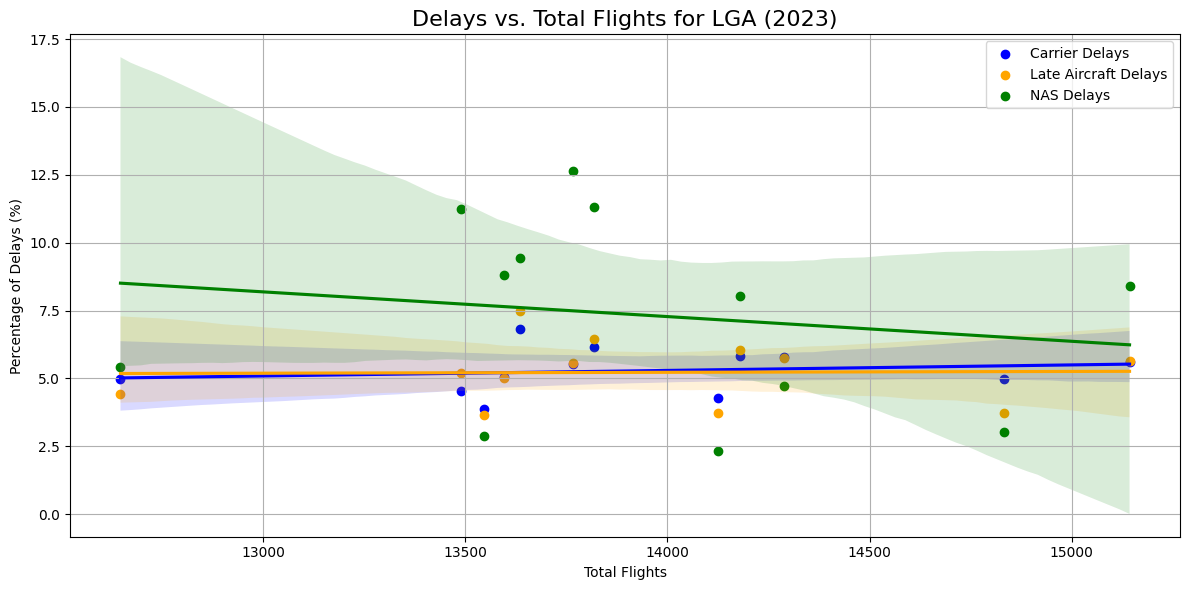

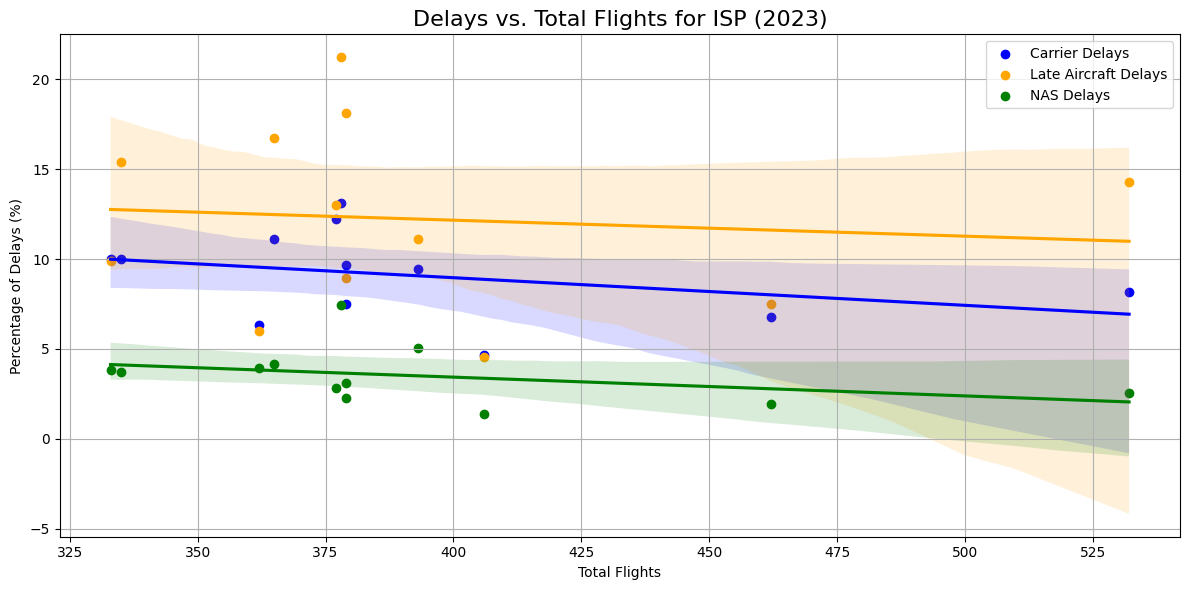

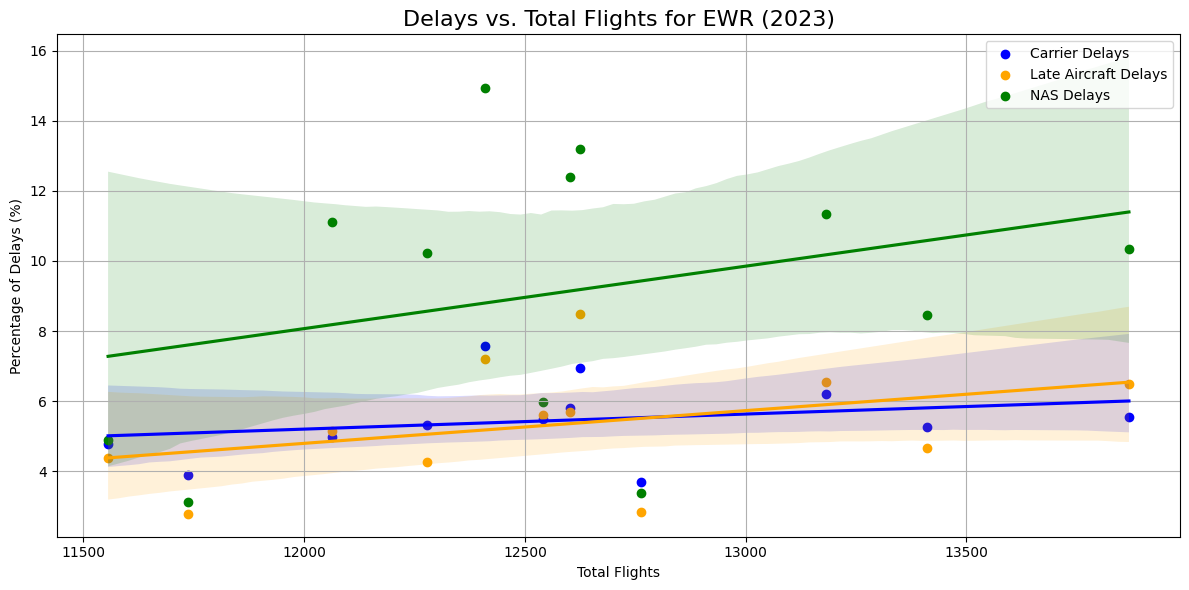

In [ ]:
# Loop through each selected airport to create individual scatter plots
for airport in selected_airports:
    # Filter data for the current airport
    airport_data = monthly_airport_delays[monthly_airport_delays['airport'] == airport]

    # Set up the figure for each airport
    plt.figure(figsize=(12, 6))

    # Scatter plot for Carrier Delays
    plt.scatter(airport_data['arr_flights'], airport_data['carrier_pct'], color='blue', label='Carrier Delays')

    # Scatter plot for Late Aircraft Delays
    plt.scatter(airport_data['arr_flights'], airport_data['late_aircraft_pct'], color='orange', label='Late Aircraft Delays')

    # Scatter plot for NAS Delays
    plt.scatter(airport_data['arr_flights'], airport_data['nas_pct'], color='green', label='NAS Delays')

    # Add linear regression lines for each delay type
    sns.regplot(x=airport_data['arr_flights'], y=airport_data['carrier_pct'], scatter=False, color='blue')
    sns.regplot(x=airport_data['arr_flights'], y=airport_data['late_aircraft_pct'], scatter=False, color='orange')
    sns.regplot(x=airport_data['arr_flights'], y=airport_data['nas_pct'], scatter=False, color='green')

    # Set the title and axis labels for the plot
    plt.title(f'Delays vs. Total Flights for {airport} (2023)', fontsize=16)
    plt.xlabel('Total Flights')
    plt.ylabel('Percentage of Delays (%)')

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


**Summary of Scatter Plots for Delays vs. Total Flights Across Different Airports (2023)**

The scatter plots show the relationship between flight delays and total flights for four airports: JFK, LGA, ISP, and EWR. Each plot highlights three types of delays: Carrier Delays, Late Aircraft Delays, and NAS Delays.

**JFK Airport:** There is a positive correlation between total flights and the percentage of all delay types, with NAS delays showing a stronger relationship.

**LGA Airport:** The relationship is less clear, indicating a more stable percentage of delays regardless of flight numbers. A slight upward trend for Carrier and NAS delays is observed.

**ISP Airport:** Carrier and NAS delays decrease as total flights increase, suggesting higher flight volumes may lead to fewer of these delays. Late Aircraft delays show no clear trend.

**EWR Airport:** A positive relationship is seen for Carrier and NAS delays, but not as pronounced as JFK. Late Aircraft delays remain lower overall.


These scatter plots reveal how different delay types vary with total flights at each airport. JFK and EWR show stronger correlations, while ISP presents a unique pattern. This analysis helps understand flight delay dynamics and may guide strategies to reduce them.

Regression Results for Carrier Delays:
                            OLS Regression Results                            
Dep. Variable:            carrier_pct   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     27.09
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           4.42e-10
Time:                        00:43:03   Log-Likelihood:                -78.652
No. Observations:                  48   AIC:                             165.3
Df Residuals:                      44   BIC:                             172.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
c

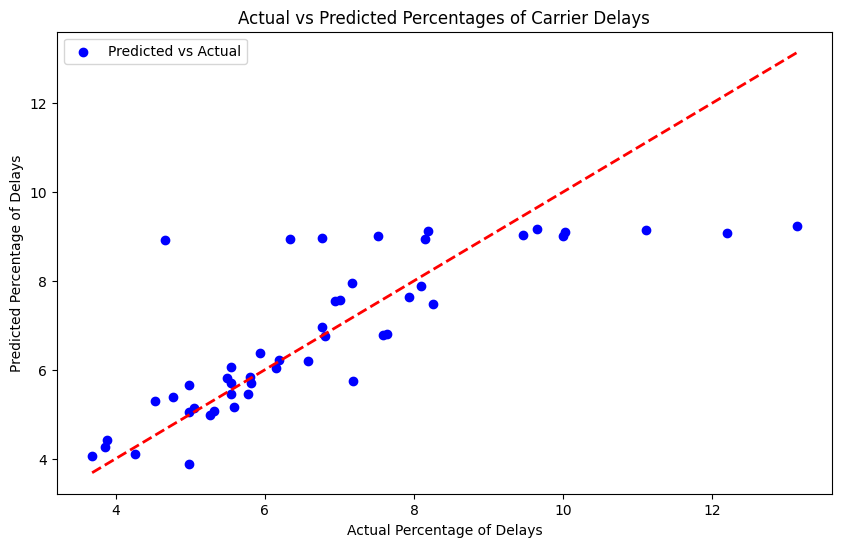

Regression Results for Late_Aircraft Delays:
                            OLS Regression Results                            
Dep. Variable:      late_aircraft_pct   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     24.42
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.86e-09
Time:                        00:43:04   Log-Likelihood:                -110.94
No. Observations:                  48   AIC:                             229.9
Df Residuals:                      44   BIC:                             237.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

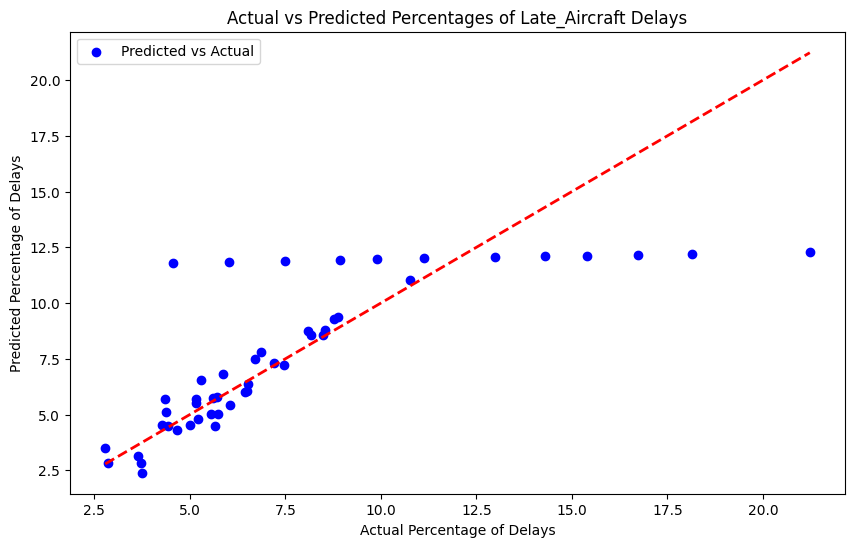

Regression Results for Nas Delays:
                            OLS Regression Results                            
Dep. Variable:                nas_pct   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     260.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.04e-28
Time:                        00:43:04   Log-Likelihood:                -59.404
No. Observations:                  48   AIC:                             126.8
Df Residuals:                      44   BIC:                             134.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const

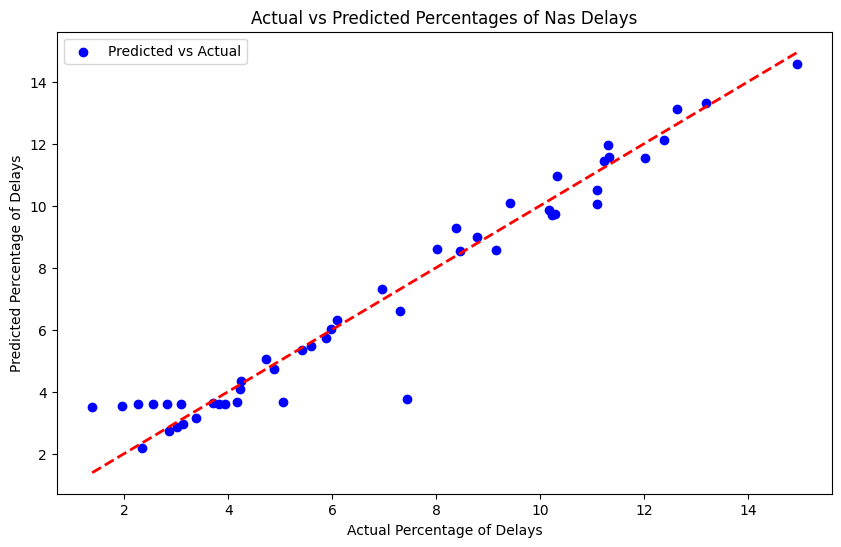

In [ ]:
# List of delay types
delay_types = ['carrier_pct', 'late_aircraft_pct', 'nas_pct']

# Loop through each delay type to perform regression analysis
for delay_type in delay_types:
    # Set the dependent variable percentage of delays
    y = monthly_airport_delays[delay_type]
    # Set the independent variables (total flights and other delay counts)
    X = monthly_airport_delays[['arr_flights', 'late_aircraft_ct', 'nas_ct']]
    X = sm.add_constant(X)  # Add a constant to the model

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f"Regression Results for {delay_type.replace('_pct', '').title()} Delays:")
    print(model.summary())

    # Plot the actual vs predicted values
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Percentage of Delays')
    plt.ylabel('Predicted Percentage of Delays')
    plt.title(f'Actual vs Predicted Percentages of {delay_type.replace("_pct", "").title()} Delays')
    plt.legend()
    plt.show()


**Summary of Regression Results for Delay Types**

**Carrier Delays:** The model explains about 64.9% of the variation in carrier delays R-squared = 0.649. Total flights and NAS delays are strong predictors, while late aircraft delays have a weaker impact. The predicted values closely match the percentages, showing that the model can effectively predict carrier delays.

** NAS Delays ** The model fits very well R-squared = 0.947. Total flights and late aircraft delays are the most significant predictors. The predicted percentages align closely with the data, confirming the model’s accuracy.

** Late Aircraft Delays ** The model explains about 62.5% of the variation R-squared = 0.625. Total flights are the main predictor, while NAS and late aircraft delays have a weaker influence. The predictions generally align with actual percentages, but the fit isn’t as strong as the other delay types.

The models for NAS and carrier delays show strong predictive power, while the model for late aircraft delays performs moderately well. The close match between predicted and actual values confirms that these models can effectively capture flight delay trends based on total flights and delay types.

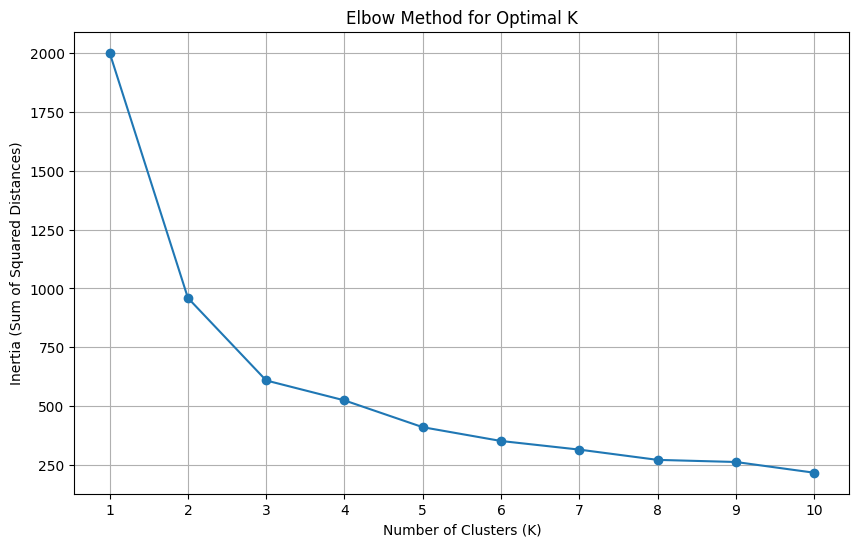

In [ ]:
# Select the delay-related features
features = df[['arr_flights', 'carrier_ct', 'late_aircraft_ct', 'nas_ct', 'weather_ct']]

# Scale the features to prepare for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate K-Means inertia for different cluster counts
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve to find the best number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.show()


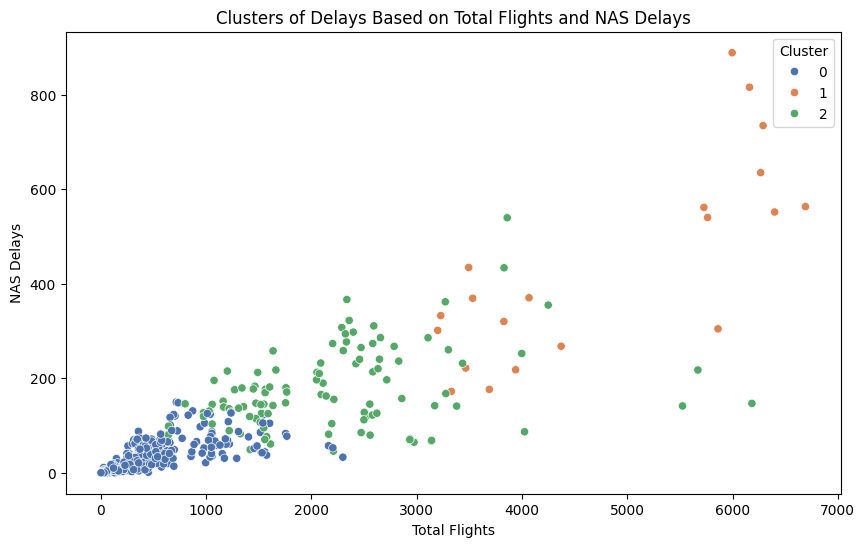

In [ ]:
# Fit K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['arr_flights'], y=df['nas_ct'], hue=df['cluster'], palette='deep')
plt.title('Clusters of Delays Based on Total Flights and NAS Delays')
plt.xlabel('Total Flights')
plt.ylabel('NAS Delays')
plt.legend(title='Cluster')
plt.show()

**Clusters of Delays Based on Total Flights and NAS Delays**
<br>
<br>
**The scatter plot shows three clusters using K-Means with 3 clusters (K=3):**

**Cluster 0 (Blue):** Airports in this group have fewer NAS delays, even with varying numbers of total flights. These airports likely manage delays well.

**Cluster 1 (Green):** These airports have moderate NAS delays, possibly due to occasional weather or operational issues.

**Cluster 2 (Orange):** Airports in this group experience high NAS delays, indicating more operational challenges.

**Key Insights:**

As total flights increase, NAS delays generally rise but vary between clusters.
The clusters highlight differences in airport performance and could help identify which airports need more resources to manage delays.
Next Steps: Investigate each cluster’s characteristics

**Exploratory Data Analysis**

In our exploratory data analysis, we examined flight delays across airlines and airports for 2023, focusing on finding key trends and patterns in what causes these delays. We saw several valuable insights using statistics, spotting outliers, running regression models, and clustering airports.

**Delay Causes and Patterns:** Carrier and NAS delays often happen, especially in July and August, when travel picks up. NAS delays were shorter, averaging 59 minutes, while Late Aircraft Delays took longer, around 91 minutes. Weather delays were rare but lasted the longest at 118 minutes.

**Monthly and Seasonal Trends:** July and August were the busiest months for delays, likely due to summer travel. July had the most delays, while September saw a drop. Security delays were low and stayed consistent throughout the year.

**Airport Performance:** At ISP, delays were caused mainly by late aircraft during the summer. JFK and EWR had more NAS delays, probably due to air traffic control issues. LGA had the fewest delays, showing more efficient scheduling and operations.

**Outlier Detection:** Using the IQR method, we found 27 outliers, mostly in late aircraft and NAS delays. We need to review these further to determine their causes.

**Regression Analysis:** The NAS delay model had a strong R squared of 0.947, closely linked to total flights and late aircraft delays, showing air traffic control problems as a significant factor. The carrier delays model had an R squared of 0.649, indicating that NAS and late aircraft delays impact airline operations.

**Clustering Analysis:** Airports were grouped into three clusters using K-Means based on total flights and NAS delays. Airports in Cluster 0 handled more flights with fewer delays, while Cluster 2 airports had more trouble with NAS delays. This helps identify airports that need better delay management.

**Conclusion:**These findings show the leading causes and patterns of flight delays in 2023, focusing on NAS and Late Aircraft delays. Understanding these trends sets the stage for further analysis. Next, we will apply multiple regression and Random Forest methods to build predictive models that can forecast delays more accurately. These models will provide valuable insights into how airports and airlines can better manage operations, especially during peak travel times, leading to more efficient scheduling and fewer delays overall.